In [4]:
import fitsio
import numpy as np
from matplotlib import pyplot as plt
import glob
import os,sys

# Some examples of what you can do with cascades_1 version of LSS catalogs

In [2]:
#catalogs are here
lssdir = '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/LSScats/cascades_1/'

## catalogs and nz for ELG, LRG, QSO, and BGS_ANY were made, both combining all tiles and tile by tile

## nz are also all split by targeting subtype

## the subtype are included in all files and one could split even the clustering files by subtype (as long as this is done for data and random)

In [9]:
#how many objects are in the clustering catalogs for each type?
tps = ['LRG','ELG','QSO','BGS_ANY']
for tp in tps:
    f = fitsio.read(lssdir+tp+'alltiles_deep_clustering.dat.fits')
    print(tp,len(f))

LRG 24851
ELG 27609
QSO 22455
BGS_ANY 93767


### That is a lot of data! What does the clustering look like?
#### The following was run from LSS/bin to find out:
salloc -N 1 -C haswell -t 01:00:00 --qos interactive --account desi

export OMP_NUM_THREADS=64

module load gsl

python xiruncz.py --type <type> --basedir --basedir /global/cfs/cdirs/desi/survey/catalogs --version cascades_1

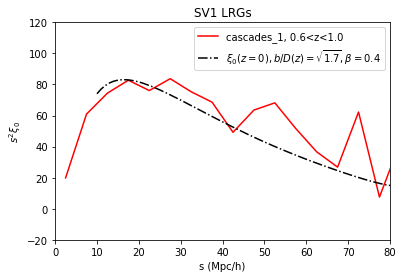

In [15]:
xicz = np.loadtxt('/global/cscratch1/sd/ajross/SV1xi/xi024SV1_cascades_1LRG0.61.05st0.dat').transpose()
plt.plot(xicz[0],xicz[0]**2.*(xicz[1]),'r-',label='cascades_1, 0.6<z<1.0')
xilin = np.loadtxt(os.environ['HOME']+'/BAOtemplates/xi0Challenge_matterpower0.44.04.08.015.00.dat').transpose()
plt.plot(xilin[0],xilin[0]**2.*xilin[1]*1.7,'k-.',label=r'$\xi_{\rm 0}(z=0),b/D(z)=\sqrt{1.7},\beta=0.4$')
plt.legend()
plt.xlabel('s (Mpc/h)')
plt.ylabel(r'$s^{2}\xi_0$')
plt.xlim(0,80)
plt.ylim(-20,120)
plt.title('SV1 LRGs')
plt.show()

## awesome

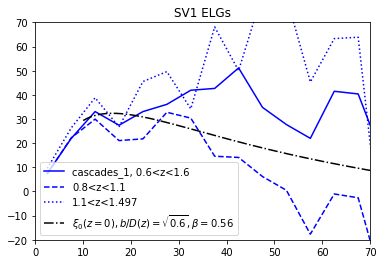

In [20]:
xicz = np.loadtxt('/global/cscratch1/sd/ajross/SV1xi/xi024SV1_cascades_1ELG0.61.65st0.dat').transpose()
plt.plot(xicz[0],xicz[0]**2.*(xicz[1]),'b-',label='cascades_1, 0.6<z<1.6')
xicz = np.loadtxt('/global/cscratch1/sd/ajross/SV1xi/xi024SV1_cascades_1ELG0.81.15st0.dat').transpose()
plt.plot(xicz[0],xicz[0]**2.*(xicz[1]),'b--',label='0.8<z<1.1')                  
xicz = np.loadtxt('/global/cscratch1/sd/ajross/SV1xi/xi024SV1_cascades_1ELG1.11.4975st0.dat').transpose()
plt.plot(xicz[0],xicz[0]**2.*(xicz[1]),'b:',label='1.1<z<1.497')                  
xilin = np.loadtxt(os.environ['HOME']+'/BAOtemplates/xi0Challenge_matterpower0.563.04.07.015.00.dat').transpose()
plt.plot(xilin[0],xilin[0]**2.*xilin[1]*.6,'k-.',label=r'$\xi_{\rm 0}(z=0),b/D(z)=\sqrt{0.6},\beta=0.56$')
plt.xlim(0,70)
plt.ylim(-20,70)
plt.legend(loc='lower left')
plt.title('SV1 ELGs')
plt.show()

## already seeing some evidence of systematic variation at large-scales for high z, but good to see strong clustering for high redshift (also note, this is with extended selection more prone to systematic variation)

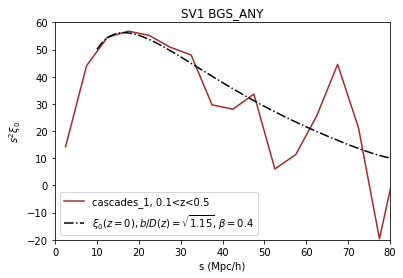

In [26]:
xicz = np.loadtxt('/global/cscratch1/sd/ajross/SV1xi/xi024SV1_cascades_1BGS_ANY0.10.55st0.dat').transpose()
plt.plot(xicz[0],xicz[0]**2.*(xicz[1]),'-',color='brown',label='cascades_1, 0.1<z<0.5')
xilin = np.loadtxt(os.environ['HOME']+'/BAOtemplates/xi0Challenge_matterpower0.44.04.08.015.00.dat').transpose()
plt.plot(xilin[0],xilin[0]**2.*xilin[1]*1.15,'k-.',label=r'$\xi_{\rm 0}(z=0),b/D(z)=\sqrt{1.15},\beta=0.4$')
plt.legend()
plt.xlabel('s (Mpc/h)')
plt.ylabel(r'$s^{2}\xi_0$')
plt.xlim(0,80)
plt.ylim(-20,60)
plt.title('SV1 BGS_ANY')
plt.show()

## very very nice

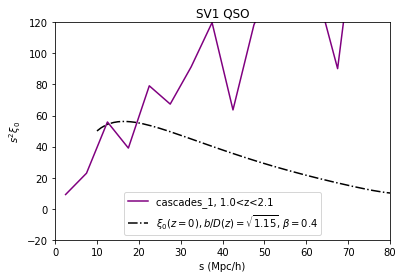

In [28]:
xicz = np.loadtxt('/global/cscratch1/sd/ajross/SV1xi/xi024SV1_cascades_1QSO1.02.15st0.dat').transpose()
plt.plot(xicz[0],xicz[0]**2.*(xicz[1]),'-',color='purple',label='cascades_1, 1.0<z<2.1')
xilin = np.loadtxt(os.environ['HOME']+'/BAOtemplates/xi0Challenge_matterpower0.44.04.08.015.00.dat').transpose()
plt.plot(xilin[0],xilin[0]**2.*xilin[1]*1.15,'k-.',label=r'$\xi_{\rm 0}(z=0),b/D(z)=\sqrt{1.15},\beta=0.4$')
plt.legend()
plt.xlabel('s (Mpc/h)')
plt.ylabel(r'$s^{2}\xi_0$')
plt.xlim(0,80)
plt.ylim(-20,120)
plt.title('SV1 QSO')
plt.show()

## out-of-the-box quasars don't really work (recall this is just using zwarn=0 and no other discrimination)

## All in all, that is quite satisfying. Others should be able to use these catalogs to do much more analysis (test different z ranges, split by types). Just make sure to apply same cuts to data and randoms

## look at n(z) split by subtype for ELGs and LRGs

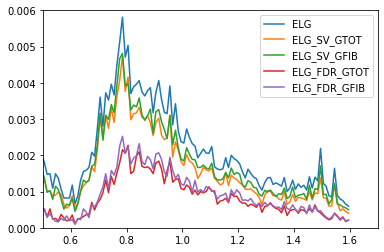

In [31]:
tps = ['ELG','ELG_SV_GTOT','ELG_SV_GFIB','ELG_FDR_GTOT','ELG_FDR_GFIB']
for tp in tps:
    nz = np.loadtxt(lssdir+tp+'alltiles_deep_nz.dat').transpose()
    plt.plot(nz[0],nz[3],label=tp)
    
plt.legend()    
plt.xlim(0.5,1.7)
plt.ylim(0,0.6e-2)
plt.show()

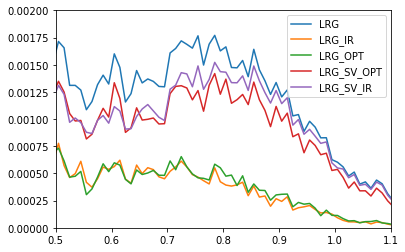

In [34]:
tps = ['LRG','LRG_IR','LRG_OPT','LRG_SV_OPT','LRG_SV_IR']
for tp in tps:
    nz = np.loadtxt(lssdir+tp+'alltiles_deep_nz.dat').transpose()
    plt.plot(nz[0],nz[3],label=tp)
    
plt.legend()    
plt.xlim(0.5,1.1)
plt.ylim(0,0.2e-2)
plt.show()

## Have a look at n(z) variation in tiles:

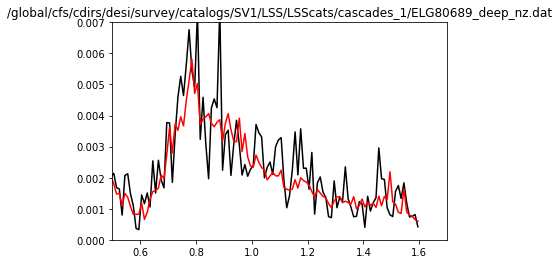

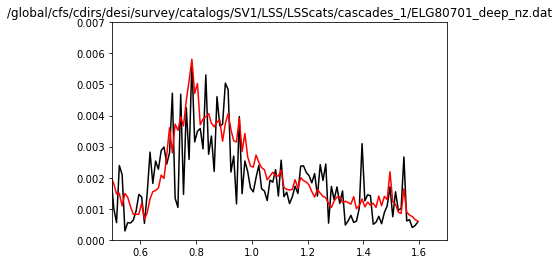

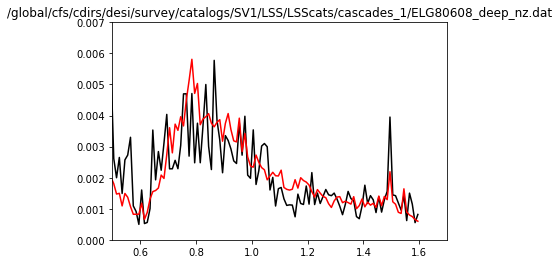

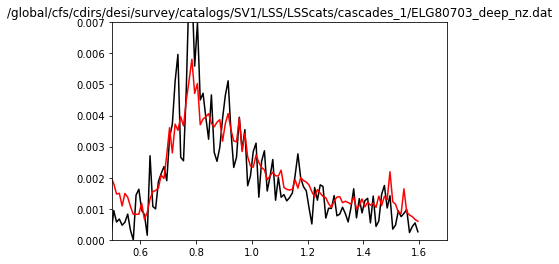

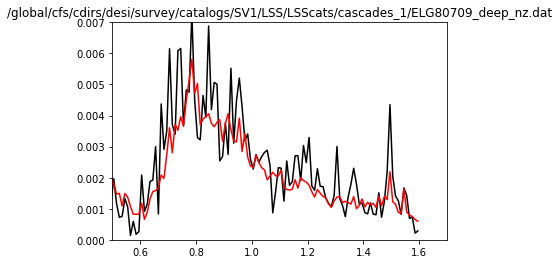

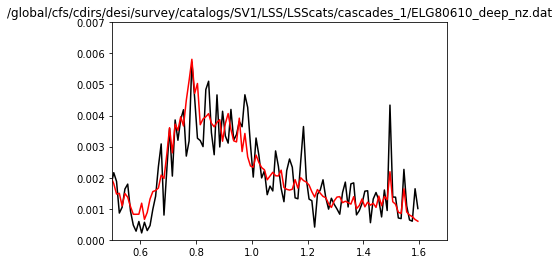

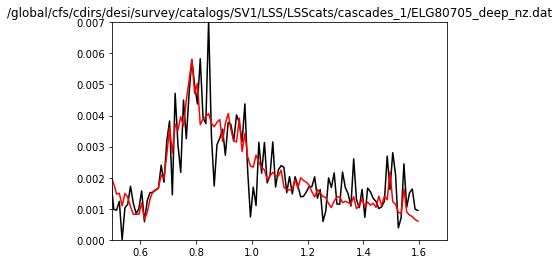

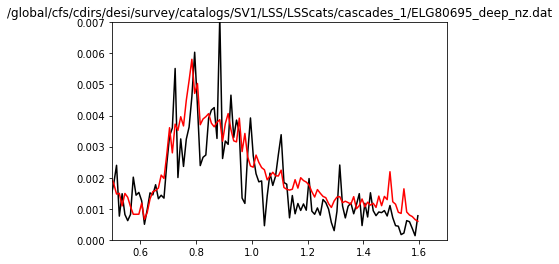

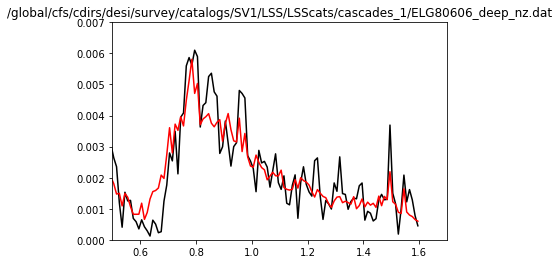

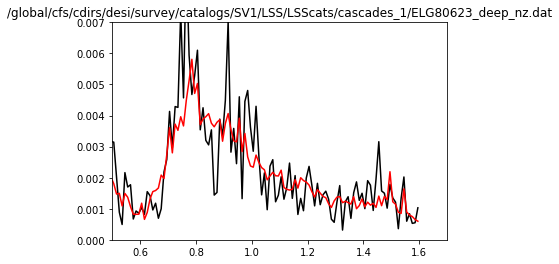

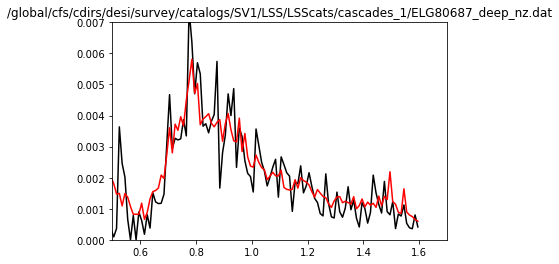

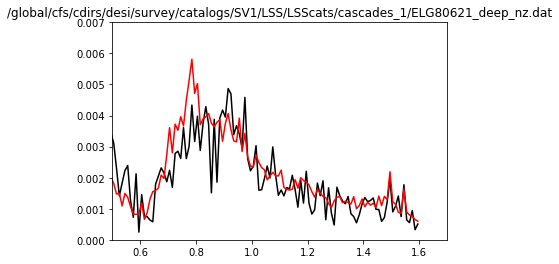

In [5]:
#look the the nz on individual tiles compared to the whole for ELGs
nzfs = glob.glob(lssdir+'ELG8*nz*')
nza = np.loadtxt(lssdir+'ELGalltiles_deep_nz.dat').transpose()
for nzf in nzfs:
    nz = np.loadtxt(nzf).transpose()
    plt.plot(nz[0],nz[3],'k-')
    plt.plot(nza[0],nza[3],'r-')
    plt.title(nzf)
    plt.xlim(0.5,1.7)
    plt.ylim(0,0.7e-2)
    plt.show()

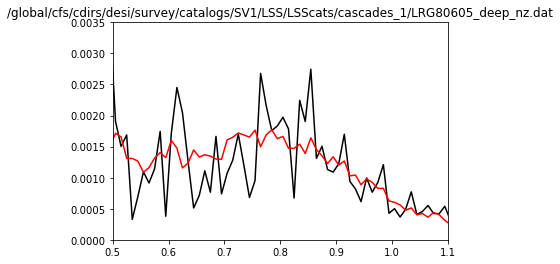

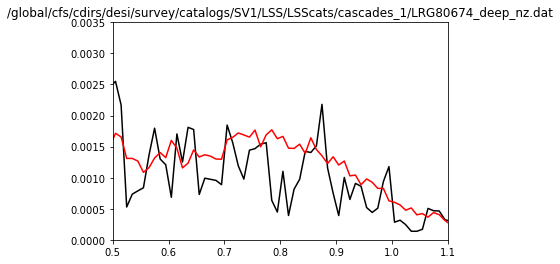

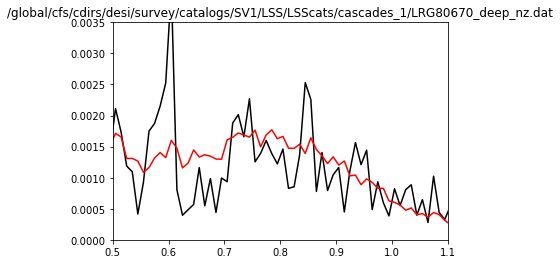

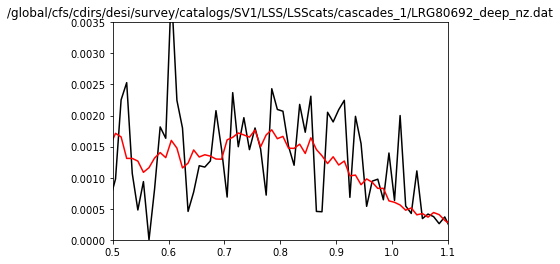

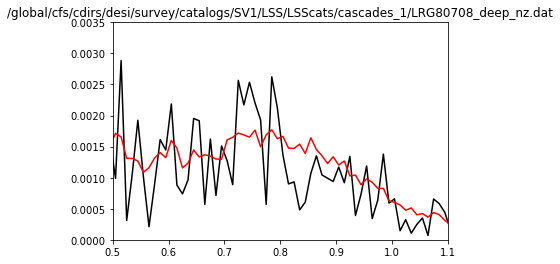

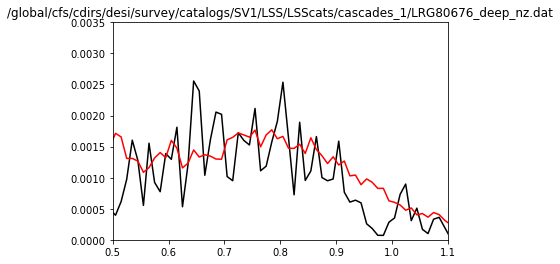

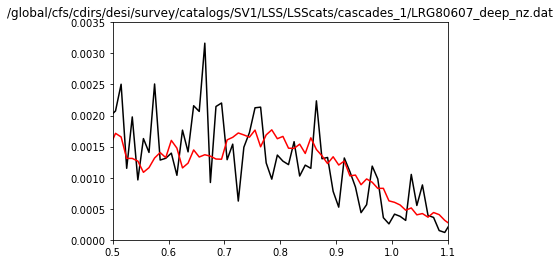

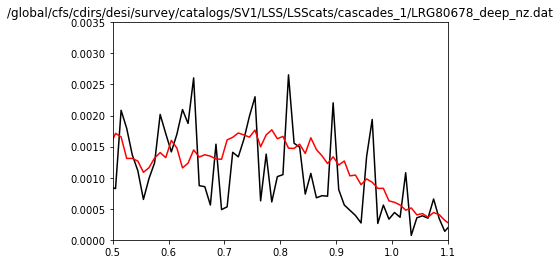

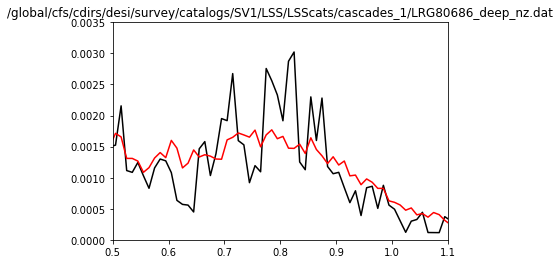

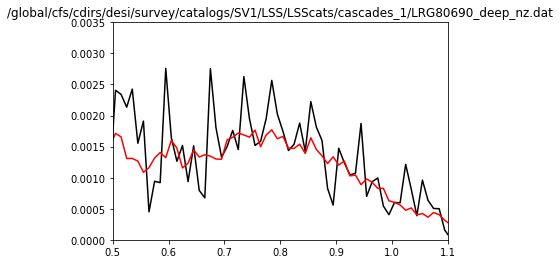

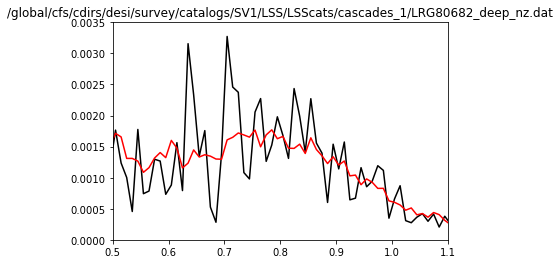

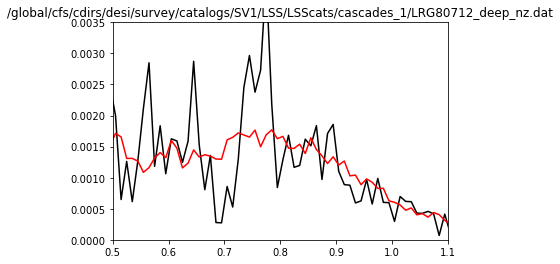

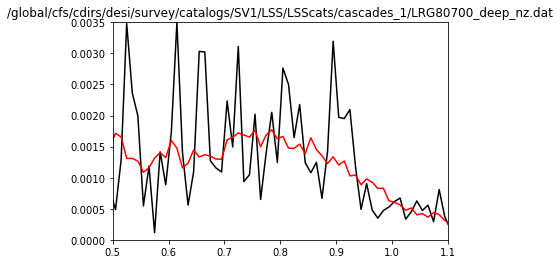

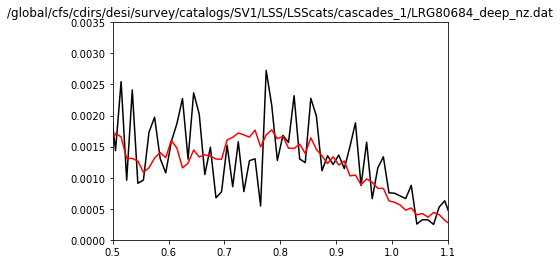

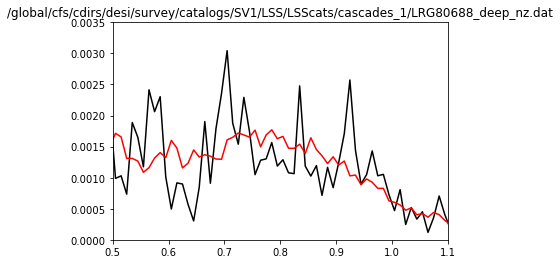

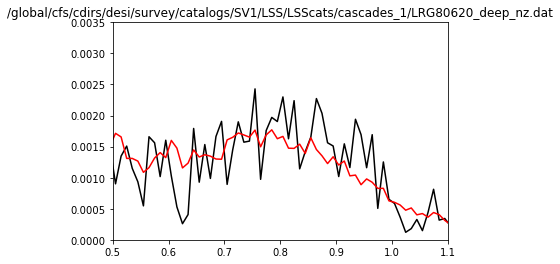

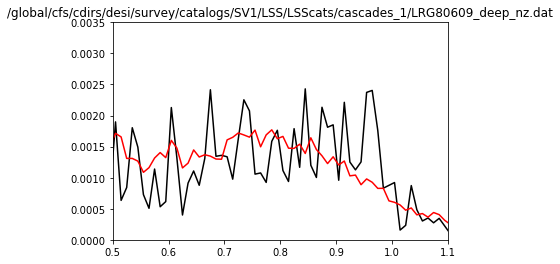

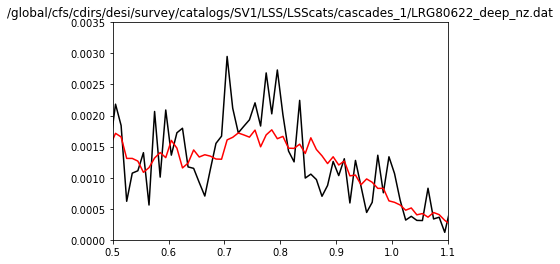

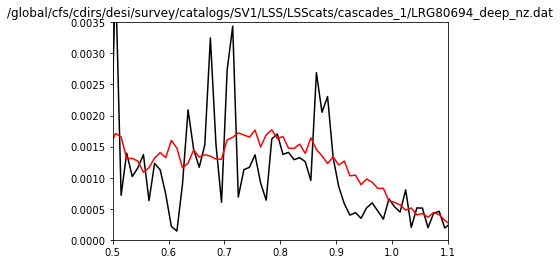

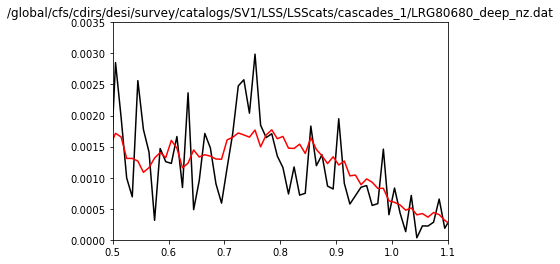

In [6]:
#look the the nz on individual tiles compared to the whole for LRGs
nzfs = glob.glob(lssdir+'LRG8*nz*')
nza = np.loadtxt(lssdir+'LRGalltiles_deep_nz.dat').transpose()
for nzf in nzfs:
    nz = np.loadtxt(nzf).transpose()
    plt.plot(nz[0],nz[3],'k-')
    plt.plot(nza[0],nza[3],'r-')
    plt.title(nzf)
    plt.xlim(0.5,1.1)
    plt.ylim(0,0.35e-2)
    plt.show()

## Look at footprint for data (color) /randoms (black) on each tile

In [35]:
expf = '/global/cfs/cdirs/desi/survey/observations/SV1/sv1-exposures.fits'  
exps = fitsio.read(expf)

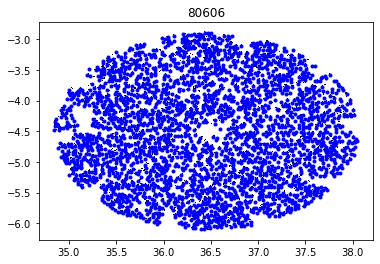

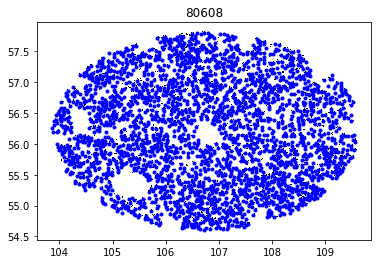

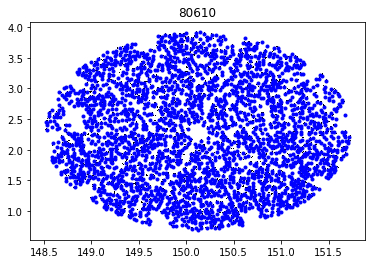

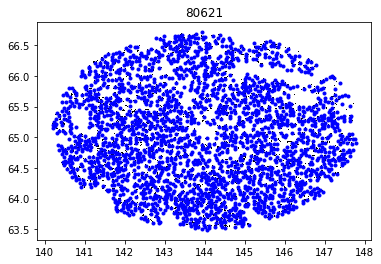

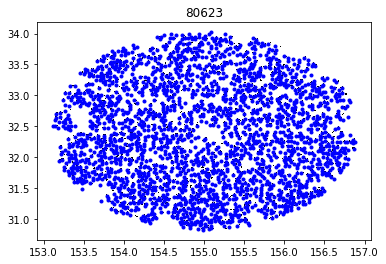

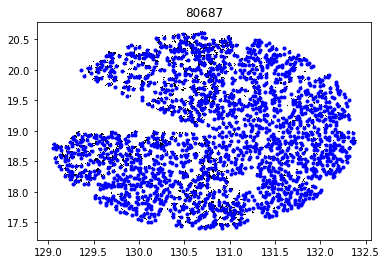

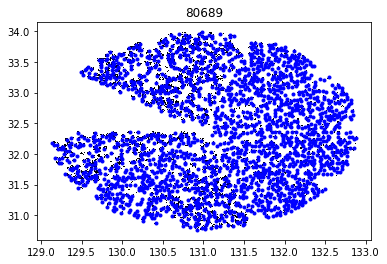

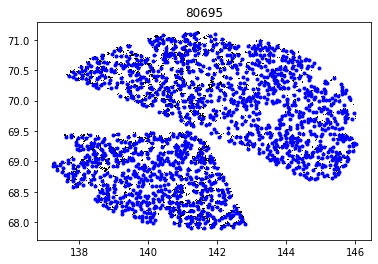

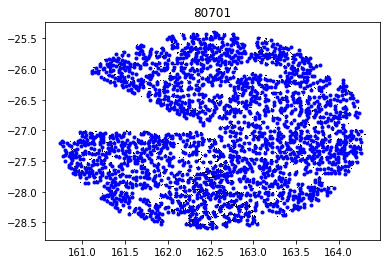

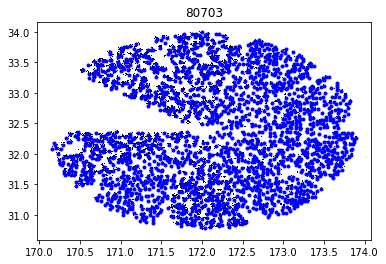

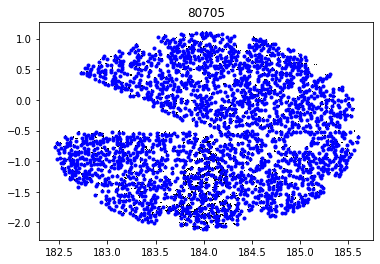

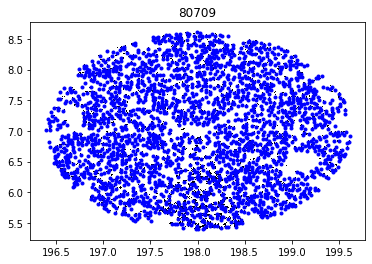

In [36]:
sel = exps['TARGETS'] == 'ELG'
tiles = np.unique(exps[sel]['TILEID'])
for tile in tiles:
    df = lssdir+'ELG'+str(tile)+'_deep_clustering.dat.fits'
    if os.path.isfile(df):
        rf = lssdir+'ELG'+str(tile)+'_deep_0_clustering.ran.fits'
        r = fitsio.read(rf)
        plt.plot(r['RA'],r['DEC'],'k,')
        d = fitsio.read(df)
        plt.plot(d['RA'],d['DEC'],'b.')
        plt.title(str(tile))
        plt.show()

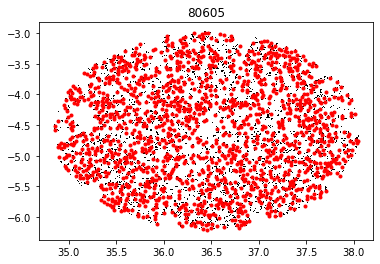

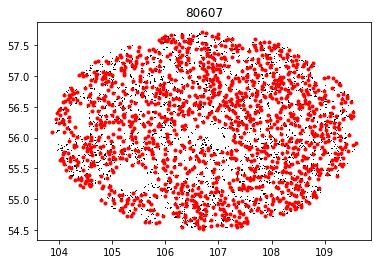

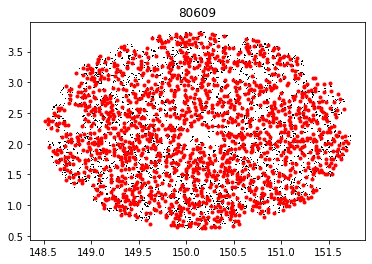

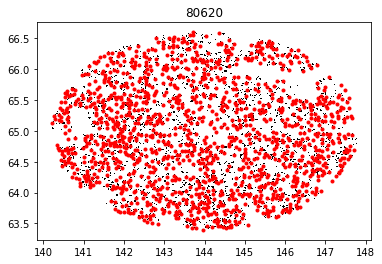

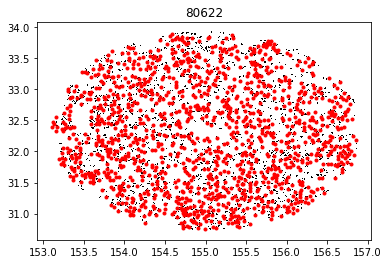

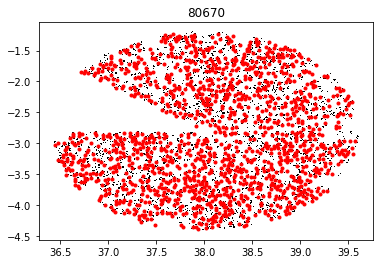

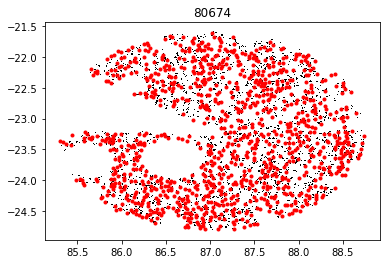

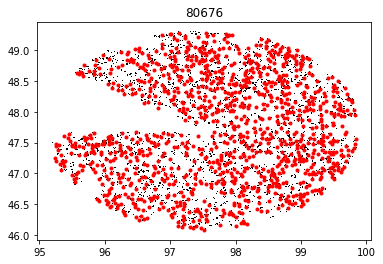

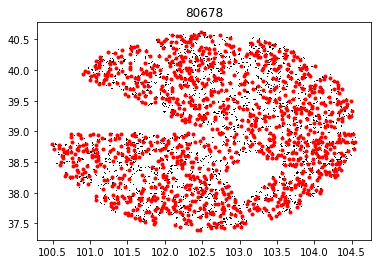

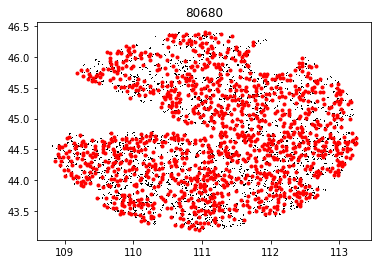

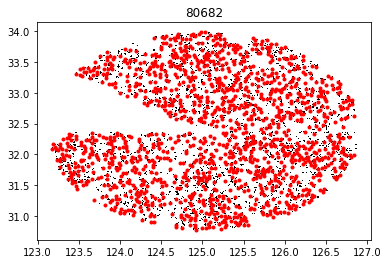

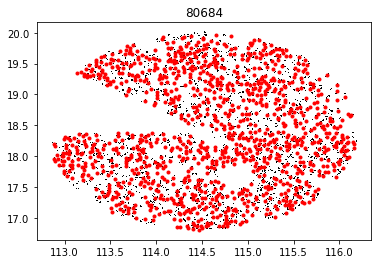

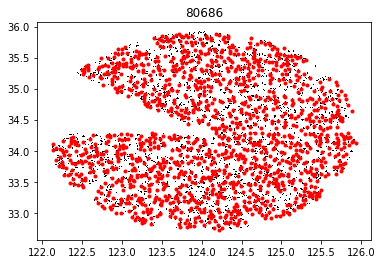

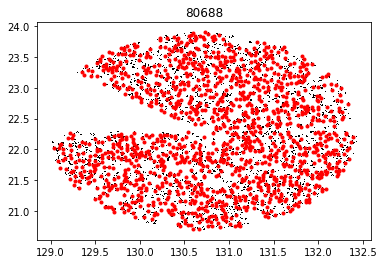

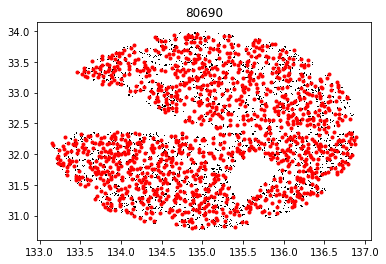

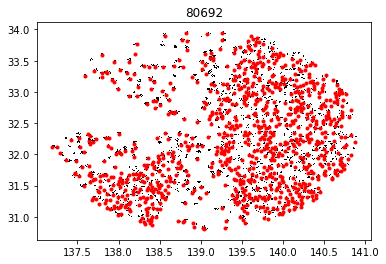

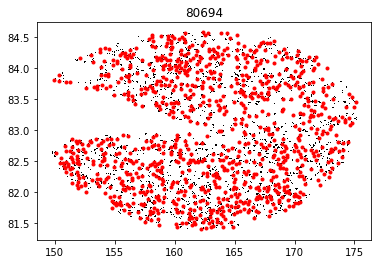

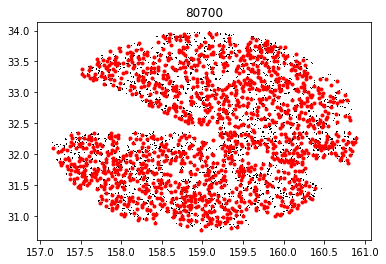

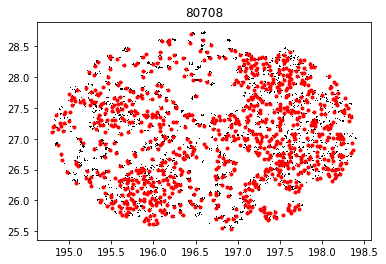

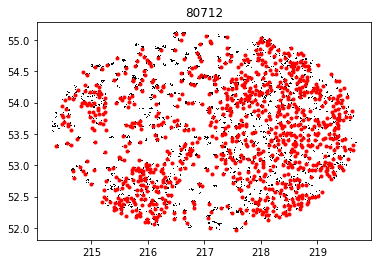

In [37]:
#now do LRGs
sel = exps['TARGETS'] == 'QSO+LRG'
tiles = np.unique(exps[sel]['TILEID'])
for tile in tiles:
    df = lssdir+'LRG'+str(tile)+'_deep_clustering.dat.fits'
    if os.path.isfile(df):
        rf = lssdir+'LRG'+str(tile)+'_deep_0_clustering.ran.fits'
        r = fitsio.read(rf)
        plt.plot(r['RA'],r['DEC'],'k,')
        d = fitsio.read(df)
        plt.plot(d['RA'],d['DEC'],'r.')
        plt.title(str(tile))
        plt.show()

## On some of these later tiles, you can see the LRGs are really sparse. Those have petals with extended fiber-reach, and high-priority quasars get most of the fibers (and the positions are vetoed).